# Credit Card Fraud Detection::

Download dataset from this link:

https://www.kaggle.com/mlg-ulb/creditcardfraud

# Description about dataset::

The datasets contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. 


### Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

# WORKFLOW :

# 1.Load Data

2.Check Missing Values ( If Exist ; Fill each record with mean of its feature )

3.Standardized the Input Variables. 

4.Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

5.Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

6.Compilation Step (Note : Its a Binary problem , select loss , metrics according to it)

7.Train the Model with Epochs (100).

8.If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .

9.Prediction should be > 92%
10.Evaluation Step
11Prediction


# Task::

## Identify fraudulent credit card transactions.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers,models  
from tensorflow.keras.models import Sequential  
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers
from sklearn.utils import shuffle

D:\ja\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\ja\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\ja\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\ja\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future vers

In [4]:
Data = pd.read_csv("creditcard.csv")
Data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [5]:
Data.shape

(284807, 31)

In [6]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
Data.corr

<bound method DataFrame.corr of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  

In [8]:
Data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [23]:
X_Train = Data[:142403]
Y_Train = Data[:142403]
X_Train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-2.483016,-0.612128,-0.058105,1.471218,0.938467,-0.042442,0.299518,0.307002,0.027342,0.415432,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,-2.483016,0.794475,0.152371,-0.400688,0.235176,0.262793,-0.125223,0.033820,0.016321,-0.152505,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-2.482968,-0.611327,-0.845148,0.868432,0.183470,-0.168782,1.342845,0.780488,0.148109,-1.307460,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-2.482968,-0.395192,-0.127933,0.884059,-0.756573,0.208904,0.911439,0.305295,0.253298,-1.190398,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-2.482921,-0.501011,0.532165,0.691111,0.201055,-0.095217,0.013784,0.610162,-0.271970,0.831793,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142398,1.529816,-0.390866,0.085630,-0.251017,-1.076029,2.228231,2.721260,0.319082,0.731882,-0.240145,...,-0.177771,-0.769466,-0.134086,1.014527,0.637807,0.220354,-0.031313,0.057888,67.61,0
142399,1.529864,0.680427,0.066917,-0.386110,0.736551,0.048310,-0.722728,0.544664,-0.213301,-0.426199,...,-0.253419,-1.015941,0.056629,0.487439,0.322926,-0.784093,-0.017026,0.035475,111.91,0
142400,1.529864,-1.086587,0.610582,0.903432,0.250559,-0.965849,0.549740,-1.136676,1.373680,0.185472,...,0.326262,0.815443,-0.316988,0.325663,0.346348,0.596696,-0.532298,-0.181901,8.99,0
142401,1.529911,-1.119558,1.379020,-0.597187,-0.419489,-0.319837,-0.367447,-0.196537,0.958723,-0.043112,...,-0.276048,-0.745789,0.016664,-0.401850,0.096932,0.093746,0.150113,-0.074114,9.99,0


In [12]:
X_Test = Data[142403:242403]
Y_Test = Data[142403:242403]
Y_Test

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
142403,84692.0,1.125592,-0.147999,1.151008,1.158851,-0.823914,0.298829,-0.708732,0.294683,0.750838,...,-0.037453,0.024388,-0.052720,-0.003615,0.405682,-0.404597,0.063357,0.024091,12.99,0
142404,84693.0,-0.439952,0.683758,1.225814,0.639113,0.716765,0.089295,0.657718,0.034213,-0.472679,...,0.127443,0.588590,-0.145728,-0.322900,-0.299744,-0.310295,0.248317,-0.011493,19.00,0
142405,84694.0,-4.868108,1.264420,-5.167885,3.193648,-3.045621,-2.096166,-6.445610,2.422536,-3.214055,...,1.269205,0.057657,0.629307,-0.168432,0.443744,0.276539,1.441274,-0.127944,12.31,1
142406,84695.0,1.013114,-0.334412,1.305208,0.837406,-1.126833,-0.064321,-0.594753,0.147737,0.536360,...,0.017079,0.112210,-0.016084,0.595033,0.201073,0.278215,0.007457,0.030762,66.60,0
142407,84695.0,0.969231,-0.233554,0.238473,0.145793,-0.545741,-0.970680,0.347393,-0.209522,-0.342571,...,-0.362820,-1.417272,0.162136,0.541628,-0.079465,0.268702,-0.101237,0.028234,141.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242398,151478.0,1.961149,-1.355510,-1.131642,-0.853575,-0.972679,-0.601629,-0.711893,-0.050950,-0.124455,...,0.363151,0.777998,-0.032842,-0.333084,-0.076484,-0.072884,-0.048458,-0.055277,120.00,0
242399,151478.0,1.927398,-0.516951,0.107110,0.634897,-1.074284,-0.489987,-0.818819,0.032662,1.355698,...,0.031672,0.196289,0.304329,0.047647,-0.555079,0.164216,0.003346,-0.030965,26.88,0
242400,151478.0,2.073149,0.025069,-1.103749,0.371262,0.025987,-1.103302,0.256477,-0.388148,0.384973,...,-0.286201,-0.636219,0.308605,-0.080228,-0.241524,0.201376,-0.063766,-0.059037,1.98,0
242401,151479.0,1.930512,-0.499214,-0.698629,0.283057,-0.415128,0.245371,-1.045088,0.239492,1.422376,...,0.147520,0.378773,0.161818,-0.113231,-0.519757,0.499659,0.002583,-0.001399,51.66,0


In [13]:
X_Val = Data[242403:]
Y_Val = Data[242403:]
Y_Val

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
242403,151480.0,1.967515,-0.368968,-0.375950,0.276752,-0.544110,-0.259578,-0.588931,0.099225,1.101204,...,-0.155199,-0.341342,0.327408,-0.391482,-0.428363,-0.620358,0.028828,-0.045271,5.00,0
242404,151480.0,2.200435,-0.614444,-2.297544,-0.987401,0.177146,-1.338390,0.296346,-0.555457,-1.000105,...,0.364197,0.925212,-0.090631,0.731271,0.469689,0.045473,-0.092537,-0.066531,61.18,0
242405,151480.0,-0.432211,0.424892,1.049483,-0.881917,0.548944,0.522928,0.576655,-0.166825,0.633361,...,0.212989,0.905996,-0.225058,0.099995,-0.438759,0.508620,-0.257513,-0.053766,36.67,0
242406,151481.0,2.071995,-0.229788,-1.182836,0.158466,0.046634,-0.487802,-0.118683,-0.160586,0.756595,...,-0.052021,-0.031256,0.201565,0.516084,-0.143455,0.537964,-0.073644,-0.055897,10.00,0
242407,151481.0,-3.154826,-0.207046,-0.956963,-1.006087,0.915881,1.476127,0.111232,1.138586,0.209168,...,-0.092067,0.034536,0.160756,-0.919386,0.086066,-0.034577,-0.553998,0.347222,73.43,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [14]:
mean=X_Train.iloc[:,:14].mean(axis=0)
X_Train.iloc[:,:14]=X_Train.iloc[:,:14]-mean
std=X_Train.iloc[:,:14].std(axis=0)
X_Train.iloc[: , 0:14] = X_Train.iloc[: , 0:14]/std
X_Train

D:\ja\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-2.483016,-0.612128,-0.058105,1.471218,0.938467,-0.042442,0.299518,0.307002,0.027342,0.415432,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,-2.483016,0.794475,0.152371,-0.400688,0.235176,0.262793,-0.125223,0.033820,0.016321,-0.152505,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-2.482968,-0.611327,-0.845148,0.868432,0.183470,-0.168782,1.342845,0.780488,0.148109,-1.307460,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-2.482968,-0.395192,-0.127933,0.884059,-0.756573,0.208904,0.911439,0.305295,0.253298,-1.190398,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-2.482921,-0.501011,0.532165,0.691111,0.201055,-0.095217,0.013784,0.610162,-0.271970,0.831793,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142398,1.529816,-0.390866,0.085630,-0.251017,-1.076029,2.228231,2.721260,0.319082,0.731882,-0.240145,...,-0.177771,-0.769466,-0.134086,1.014527,0.637807,0.220354,-0.031313,0.057888,67.61,0
142399,1.529864,0.680427,0.066917,-0.386110,0.736551,0.048310,-0.722728,0.544664,-0.213301,-0.426199,...,-0.253419,-1.015941,0.056629,0.487439,0.322926,-0.784093,-0.017026,0.035475,111.91,0
142400,1.529864,-1.086587,0.610582,0.903432,0.250559,-0.965849,0.549740,-1.136676,1.373680,0.185472,...,0.326262,0.815443,-0.316988,0.325663,0.346348,0.596696,-0.532298,-0.181901,8.99,0
142401,1.529911,-1.119558,1.379020,-0.597187,-0.419489,-0.319837,-0.367447,-0.196537,0.958723,-0.043112,...,-0.276048,-0.745789,0.016664,-0.401850,0.096932,0.093746,0.150113,-0.074114,9.99,0


In [15]:
val_mean = X_Val.iloc[:, 0:14].mean(axis=0)
val_std = X_Val.iloc[:, 0:14].std(axis=0)
X_Val.iloc[:, 0:14] -= val_mean
X_Val.iloc[:, 0:14] /= val_std

D:\ja\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [16]:
test_mean = X_Test.iloc[:, 0:14].mean(axis=0)
test_std =  X_Test.iloc[:, 0:14].std(axis=0)
X_Test.iloc[:, 0:14] -= test_mean
X_Test.iloc[:, 0:14] /= test_std
X_Test

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
142403,-2.429572,0.419231,-0.040894,1.228098,0.836602,-0.794227,0.258667,-0.640414,0.333606,0.544540,...,-0.037453,0.024388,-0.052720,-0.003615,0.405682,-0.404597,0.063357,0.024091,12.99,0
142404,-2.429515,-0.319753,0.432737,1.278981,0.495388,0.302056,0.106706,0.409809,0.106718,-0.529843,...,0.127443,0.588590,-0.145728,-0.322900,-0.299744,-0.310295,0.248317,-0.011493,19.00,0
142405,-2.429457,-2.409978,0.763386,-3.069955,2.172472,-2.375101,-1.478270,-5.049655,2.187126,-2.937073,...,1.269205,0.057657,0.629307,-0.168432,0.443744,0.276539,1.441274,-0.127944,12.31,1
142406,-2.429400,0.366138,-0.147044,1.332984,0.625570,-1.009772,-0.004702,-0.552813,0.205605,0.356205,...,0.017079,0.112210,-0.016084,0.595033,0.201073,0.278215,0.007457,0.030762,66.60,0
142407,-2.429400,0.345424,-0.089612,0.607401,0.171517,-0.596291,-0.662026,0.171300,-0.105594,-0.415593,...,-0.362820,-1.417272,0.162136,0.541628,-0.079465,0.268702,-0.101237,0.028234,141.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242398,1.400105,0.813639,-0.728493,-0.324539,-0.484581,-0.900082,-0.394378,-0.642844,0.032534,-0.224063,...,0.363151,0.777998,-0.032842,-0.333084,-0.076484,-0.072884,-0.048458,-0.055277,120.00,0
242399,1.400105,0.797708,-0.250988,0.518049,0.492620,-0.972380,-0.313411,-0.725025,0.105367,1.075674,...,0.031672,0.196289,0.304329,0.047647,-0.555079,0.164216,0.003346,-0.030965,26.88,0
242400,1.400105,0.866506,0.057657,-0.305567,0.319540,-0.189474,-0.758208,0.101424,-0.261190,0.223270,...,-0.286201,-0.636219,0.308605,-0.080228,-0.241524,0.201376,-0.063766,-0.059037,1.98,0
242401,1.400162,0.799178,-0.240888,-0.030008,0.261632,-0.503352,0.219897,-0.898931,0.285531,1.134225,...,0.147520,0.378773,0.161818,-0.113231,-0.519757,0.499659,0.002583,-0.001399,51.66,0


In [17]:
X_Train.shape

(142403, 31)

In [18]:
X_Test.shape

(100000, 31)

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras import regularizers

In [20]:
network = models.Sequential()
network.add(layers.Dense(10,activation = 'relu',input_shape=(X_Train.shape[1],)))
network.add(layers.Dense(8,activation = 'relu'))
network.add(layers.Dense(6,activation = 'relu'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [21]:
network.compile(optimizer = 'rmsprop', loss = "mse" , metrics = ['mae'])       

In [24]:
network.fit(X_Train , Y_Train , epochs = 100, validation_data = (X_Val , Y_Val))

ValueError: A target array with shape (142403, 31) was passed for an output of shape (None, 6) while using as loss `mean_squared_error`. This loss expects targets to have the same shape as the output.

In [25]:
network.add(layers.Dense(16, activation='relu', kernel_regularizer =regularizers.l2(0.02),   input_shape=(X_Train.shape[1],)))
network.add(layers.Dense(14, activation='relu', kernel_regularizer =regularizers.l2(0.02)))
network.add(layers.Dense(8, activation='relu', kernel_regularizer =regularizers.l2(0.02)))
network.add(layers.Dense(6, activation='relu', kernel_regularizer =regularizers.l2(0.002)))
network.add(layers.Dense(1))

In [26]:
network.compile(optimizer='adam', loss='mse', metrics=['mae'])
network.fit(X_Train,Y_Train, batch_size=16, epochs=200, validation_data=(X_Val, Y_Val))

ValueError: A target array with shape (142403, 31) was passed for an output of shape (None, 1) while using as loss `mean_squared_error`. This loss expects targets to have the same shape as the output.

No handles with labels found to put in legend.


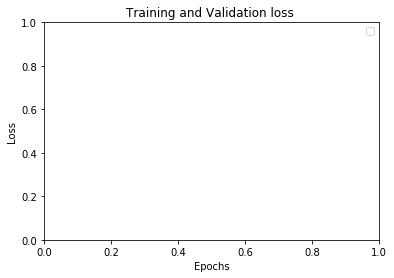

In [27]:
plt.title('Training and Validation loss ')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [28]:
a=network.predict(X_Test)
print(a[0])
np.array(Y_Test)[0]

[-0.03274357]


array([-2.42957216e+00,  4.19231056e-01, -4.08940038e-02,  1.22809831e+00,
        8.36602276e-01, -7.94227061e-01,  2.58667365e-01, -6.40414496e-01,
        3.33606288e-01,  5.44540319e-01, -3.86812093e-02,  7.00470747e-01,
        7.97337005e-01, -6.60905152e-01, -5.46091250e-02, -4.27454056e-01,
        4.00527136e-01, -5.81417302e-01,  6.19128089e-01,  2.04921882e-01,
       -1.45903790e-01, -3.74527780e-02,  2.43876462e-02, -5.27202438e-02,
       -3.61488494e-03,  4.05681822e-01, -4.04596965e-01,  6.33572258e-02,
        2.40908380e-02,  1.29900000e+01,  0.00000000e+00])